In [56]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/214/Downloads/owid-covid-data.csv")


# 1) 원하는 열 리스트 만들기
selected_columns = ['iso_code', 'location', 'date', 'total_cases', 'population']
# >>> iso_code = 국제 표준 국가 코드, location = 국가 이름, date = 일자, total_cases = 확진자 수, population = 인구

# 2) 원하는 열로 개정된 데이터프레임 생성
revised_df = df[selected_columns]

"""
# 3) 개정된 데이터프레임 데이터 일부 확인
revised_df.head()
"""

# location 열에 있는 값 추출하기
locations = revised_df['location']

#대한민국 전용 데이터프레임 생성
kor_df = revised_df[revised_df.location == 'South Korea']
fra_df = revised_df[revised_df.location == 'France']

,iso_code,location,date,total_cases,population
359238,KOR,South Korea,2020-01-05,0.0,51815808
359239,KOR,South Korea,2020-01-06,0.0,51815808
359240,KOR,South Korea,2020-01-07,0.0,51815808
359241,KOR,South Korea,2020-01-08,0.0,51815808
359242,KOR,South Korea,2020-01-09,0.0,51815808


In [42]:
#색인 변경하기
kor_date_index_df = kor_df.set_index('date')

kor_date_index_df.head()

fra_date_index_df = fra_df.set_index('date')

In [45]:
#대한민국 확진자 수 구하기
kor_total_cases = kor_date_index_df['total_cases']
kor_date_index_df.index

#프랑스 확진자 수 구하기
fra_total_cases = fra_date_index_df['total_cases']
fra_date_index_df.index

Index(['2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
       '2020-01-10', '2020-01-11', '2020-01-12', '2020-01-13', '2020-01-14',
       ...
       '2024-07-26', '2024-07-27', '2024-07-28', '2024-07-29', '2024-07-30',
       '2024-07-31', '2024-08-01', '2024-08-02', '2024-08-03', '2024-08-04'],
      dtype='object', name='date', length=1674)

In [47]:
final_df = pd.DataFrame({
    'kor':kor_total_cases,
    'fra':fra_total_cases
    }, index = kor_date_index_df.index
)

final_df.head()

,kor,fra
date,,
2020-01-05,0.0,0.0
2020-01-06,0.0,0.0
2020-01-07,0.0,0.0
2020-01-08,0.0,0.0
2020-01-09,0.0,0.0


<Axes: xlabel='date'>

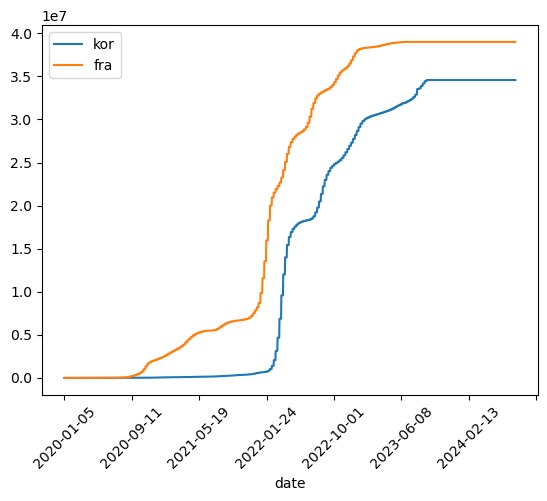

In [54]:
final_df.plot.line(rot=45)

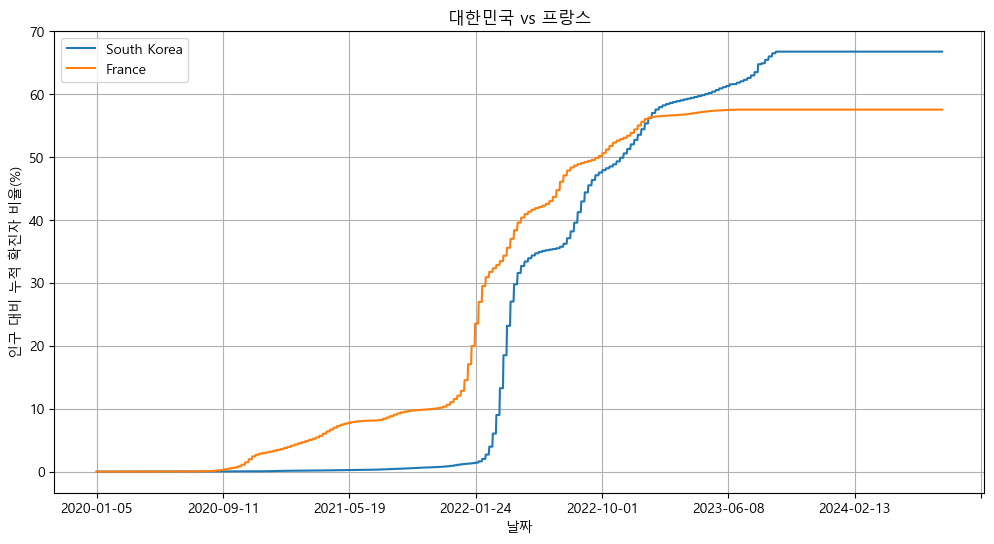

In [66]:
# 대한민국과 프랑스의 코로나 상황에 대해 '일자별 총 인구 대비 확진자 수 비율 변동 추이'
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/214/Downloads/owid-covid-data.csv")

selected_columns = ['iso_code', 'location', 'date', 'total_cases', 'population'] 

revised_df = df[selected_columns] 

locations = revised_df['location'] 

#한국
kor_df = revised_df[revised_df.location == 'South Korea'] 
kor_date_index_df = kor_df.set_index('date')
kor_total_cases = kor_date_index_df['total_cases']
kor_pop = kor_df['population'].iloc[0]

#프랑스
fra_df = revised_df[revised_df.location == 'France'] 
fra_date_index_df = fra_df.set_index('date')
fra_total_cases = fra_date_index_df['total_cases']
fra_pop = fra_df['population'].iloc[0]

#인구 대비 비율 계산
kor_ratio = kor_total_cases / kor_pop *100
fra_ratio = fra_total_cases / fra_pop *100

final_df = pd.DataFrame({
    'South Korea':kor_ratio,
    'France':fra_ratio
}).sort_index()

final_df.plot(figsize=(12,6))
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel("날짜")
plt.ylabel("인구 대비 누적 확진자 비율(%)")
plt.title("대한민국 vs 프랑스")
plt.grid(True)
plt.show()

In [ ]:
# 원하는 국가 2개 추가하여 '올해 확진자 비율 비교'